In [3]:
# Importing reqlibraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
from keras import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
train_loc = "braintumour\Training/"
test_loc =  "braintumour\Testing/"

In [5]:
data = ImageDataGenerator(rescale= 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True,
                          width_shift_range=0.2, 
                          height_shift_range=0.2,
                          rotation_range=30)

train_data = data.flow_from_directory(directory = train_loc, 
                                       target_size = (224,224),
                                      )


NameError: name 'ImageDataGenerator' is not defined

In [5]:
data = ImageDataGenerator(rescale= 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True,
                          width_shift_range=0.2, 
                          height_shift_range=0.2,
                          rotation_range=30
)

test_data = data.flow_from_directory(directory = test_loc, 
                                       target_size = (224,224),
                                      )

Found 1311 images belonging to 4 classes.


In [6]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [7]:
test_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [8]:
input_shape = (224,224,3)

In [9]:
# CNN Model

# Input Layer
image_imput = Input(shape  = input_shape, name = 'image_input')

# First Layer
my_model = Conv2D(256, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (image_imput)
my_model = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (my_model)
my_model = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (my_model)
my_model = Dropout(0.25)(my_model)

# Second Layer
my_model = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (my_model)
my_model = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (my_model)
my_model = Dropout(0.25)(my_model)

# Third Layer
my_model = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (my_model)
my_model = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (my_model)
my_model = Dropout(0.25)(my_model)

# Forth Layer
my_model = Conv2D(64, (3,3) , padding = 'same' , activation='relu') (my_model)
my_model = MaxPool2D((2,2), strides=(2,2)) (my_model)
my_model = Dropout(0.25)(my_model)

# Connented Layer and Output Layer
my_model = Flatten()(my_model)
my_model = Dense(32, name = 'layer_8')(my_model)
my_model = Dropout(0.5) (my_model)
my_model = Dense(4, activation='sigmoid', name='predictions')(my_model)

In [10]:
# Generate the model
model = Model(inputs = image_imput, outputs =my_model , name='Brain_Tumer')

In [11]:
model.summary()

Model: "Brain_Tumer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 256)     7168      
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      147520    
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 128)       

In [12]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Fit CNN model
batch_size=32
model.fit(train_data, 
         steps_per_epoch=train_data.samples//batch_size,
                    validation_data=test_data, 
                    validation_steps=test_data.samples//batch_size, 
                    epochs=100, 
                    verbose=1)

Epoch 1/100


2023-03-01 21:10:40.337160: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inBrain_Tumer/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


178/178 [==============================] - 145s 756ms/step - loss: 1.1627 - accuracy: 0.4484 - val_loss: 1.2003 - val_accuracy: 0.4703
Epoch 2/100
178/178 [==============================] - 113s 632ms/step - loss: 1.0139 - accuracy: 0.5581 - val_loss: 1.0395 - val_accuracy: 0.5758
Epoch 3/100
178/178 [==============================] - 112s 627ms/step - loss: 0.9288 - accuracy: 0.5998 - val_loss: 1.0432 - val_accuracy: 0.5805
Epoch 4/100
178/178 [==============================] - 114s 641ms/step - loss: 0.9081 - accuracy: 0.6148 - val_loss: 0.9689 - val_accuracy: 0.6078
Epoch 5/100
178/178 [==============================] - 111s 621ms/step - loss: 0.8378 - accuracy: 0.6532 - val_loss: 0.8376 - val_accuracy: 0.6672
Epoch 6/100
178/178 [==============================] - 113s 637ms/step - loss: 0.7849 - accuracy: 0.6805 - val_loss: 0.7792 - val_accuracy: 0.6750
Epoch 7/100
178/178 [==============================] - 114s 637ms/step - loss: 0.7189 - accuracy: 0.7192 - val_loss: 0.7413 - val_

In [14]:
df= pd.DataFrame(model.history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.167835,0.939613,0.254323,0.917969
96,0.173382,0.938028,0.217535,0.927344
97,0.172109,0.946127,0.177315,0.942969
98,0.168392,0.938204,0.296323,0.906250
99,0.177869,0.937324,0.266195,0.912500


<AxesSubplot:>

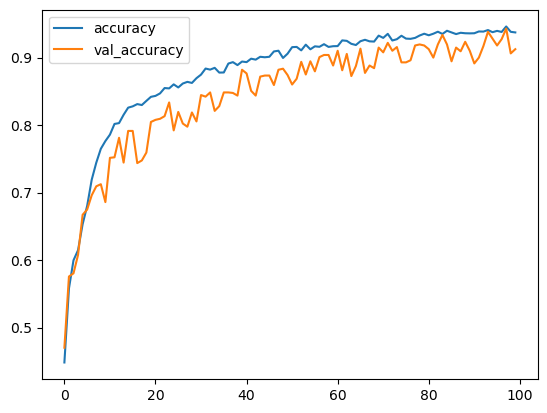

In [15]:
df[['accuracy','val_accuracy']].plot()

In [16]:
predictions = model.predict(test_data)
train_data.class_indices


41/41 [==============================] - 18s 431ms/step


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [17]:
model.evaluate(test_data)


41/41 [==============================] - 17s 423ms/step - loss: 0.2698 - accuracy: 0.9123


[0.26976698637008667, 0.9122806787490845]